Linear Regression is a supervised learning algorithm used to predict a continuous value based on the linear relationship between input features and the output.

# 📈 Linear Regression: California Housing Price Prediction


## 🧩 1. Problem Statement

Business Problem: Predict house prices in California based on housing data to assist real estate companies in pricing and investment decisions.

### Why Linear Regression for This Problem?
- Continuous Output: We're predicting price, a numeric/continuous value.
- Simple & Interpretable: Easy to understand and explain results.
- Baseline Model: Ideal for initial analysis before trying complex models.
- The relationship between features like number of rooms and price is often linear, making this a great fit.

In [2]:
# Step1. Importing Req. libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
#  Step 2: Load Dataset
california = fetch_california_housing()

In [4]:
california_df = pd.DataFrame(california.data, columns=california.feature_names)

In [5]:
california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [6]:
california_df['MedHouseVal'] = california.target  # Add target (median house value)

In [7]:
california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


#### Step 3: Exploratory Data Analysis (EDA)

In [9]:
california_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [10]:
california_df.shape

(20640, 9)

In [11]:
california_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [12]:
california_df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

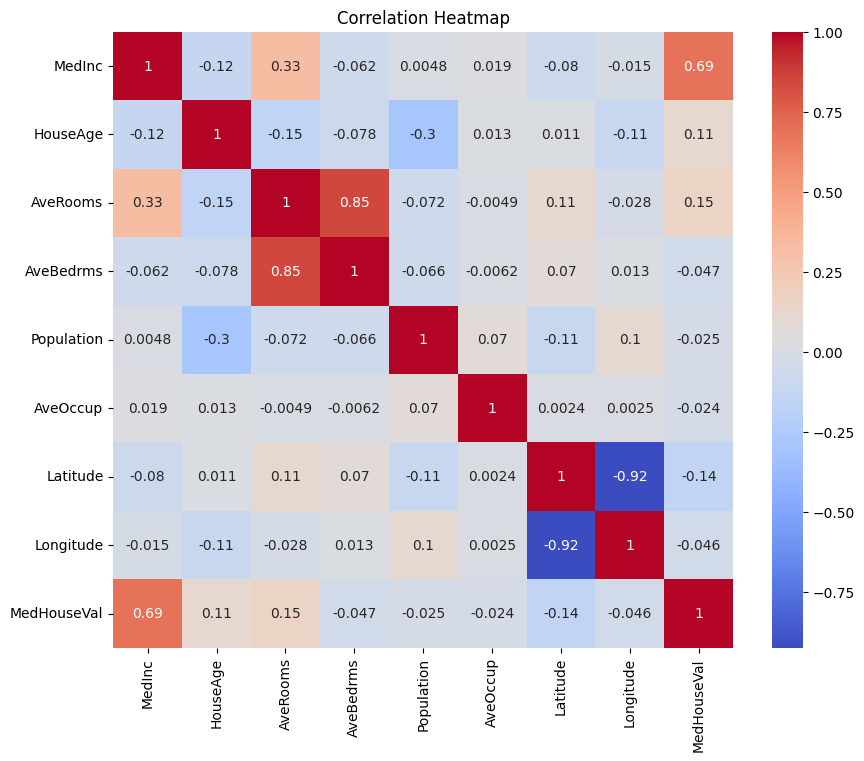

In [13]:
# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(california_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [14]:
# Step 4: Feature Selection
# Using only 'MedInc' for simple linear regression

X = california_df['MedInc']
y = california_df['MedHouseVal']

In [15]:
# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
print(f"Shape of X_train {X_train.shape}")
print(f"Shape of X_test {X_test.shape}")
print(f"Shape of y_train {y_train.shape}")
print(f"Shape of y_test {y_test.shape}")

Shape of X_train (16512, 1)
Shape of X_test (4128,)
Shape of y_train (16512,)
Shape of y_test (4128,)


In [20]:
X_train = X_train.values.reshape(-1, 1)

In [21]:
y_train = y_train.values 

In [22]:
# Step 6: Train Linear Regression Model
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

LinearRegression()

In [24]:

# Model Coefficients
print(f"Intercept: {linear_regression_model.intercept_}")
print(f"Coefficient: {linear_regression_model.coef_[0]}")

Intercept: 0.44459729169078677
Coefficient: 0.4193384939381274


In [26]:
# Step 7: Make Predictions

# Reshape X_test if it has a single feature
X_test = X_test.values.reshape(-1, 1)

# Make predictions
y_pred = linear_regression_model.predict(X_test)

# Compare actual vs predicted
df_pred = pd.DataFrame({'Actual': y_test[:5].values, 'Predicted': y_pred[:5]})
print(df_pred)


    Actual  Predicted
0  0.47700   1.149589
1  0.45800   1.506069
2  5.00001   1.903937
3  2.18600   2.850594
4  2.78000   2.006633


In [27]:
 # Step 8: Evaluate Model

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")


Mean Squared Error: 0.71
R2 Score: 0.46


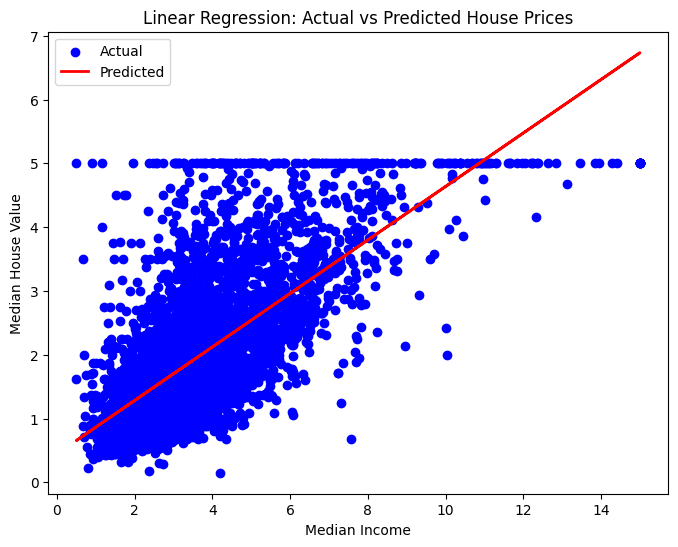

In [28]:
 # Step 9: Visualize Predictions
# Scatter plot with regression line
plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Linear Regression: Actual vs Predicted House Prices')
plt.legend()
plt.show()
